<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #10: Nubes de palabras
`Fecha de entrega: Mayo 13, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [50]:
import re
import pandas as pd 
from pprint import pprint
import numpy as np

from nltk.corpus import stopwords
stopwords = stopwords.words('english')


In [51]:
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
from wordcloud import WordCloud, ImageColorGenerator

In [52]:
# Cargar datos
path = './sampleFiles/train_disasters.csv'
data = pd.read_csv(path)
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Punto 1: Hacer pre-procesamiento del texto

In [53]:
# Definción de función pre-procesado sin concatenación
stopwords.extend(["https", "http", "co", "com", "edu","eu","one","u","û","q","k","w","a","p","pg","b","c","f","z","j",
                  "v","n","g","e","r","x","l","h","st","rt","lol"])
def preProcesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords]
    texto = ' '.join(texto)
    return texto

data["pre_procesado"] = data["text"].apply(lambda texto: preProcesado(texto))
data.head()

,id,keyword,location,text,target,pre_procesado
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


###  Punto 2: Nube de palabras

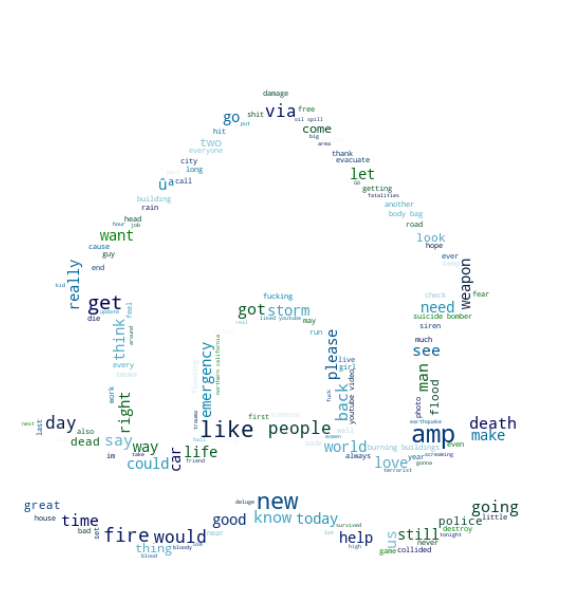

In [93]:

# Crear una nube de palabras
palabras = data.pre_procesado.str.cat(sep=" ")

img = PIL.Image.open("./sampleFiles/flood01.png")
mask = np.array(img)
mask



wordcloud = WordCloud(width=800, height=600,
                      max_font_size=80, max_words=150,
                      background_color="white", colormap="ocean_r",
                      stopwords=stopwords,collocations=True, 
                      mask=mask).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
image_colors=ImageColorGenerator(mask)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



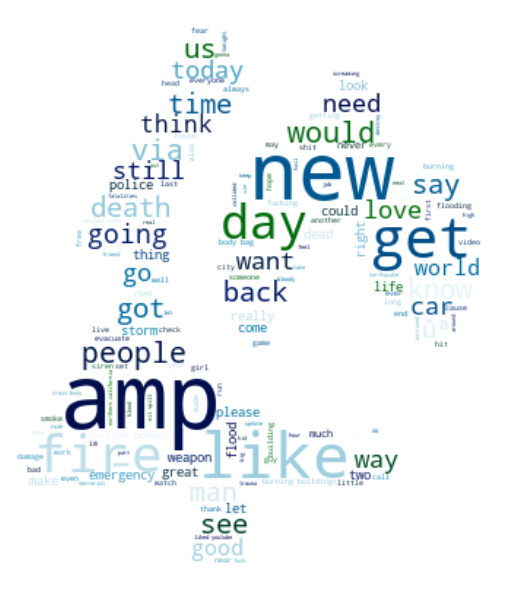

In [94]:

# Crear una nube de palabras
palabras = data.pre_procesado.str.cat(sep=" ")

img = PIL.Image.open("./sampleFiles/fire01.png")
mask = np.array(img)
mask



wordcloud = WordCloud(width=800, height=600,
                      max_font_size=100, max_words=150,
                      background_color="white", colormap="ocean_r",
                      stopwords=stopwords,collocations=True, 
                      mask=mask).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
image_colors=ImageColorGenerator(mask)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

###  Punto 3: Exportar resultados pre procesados para nube en Tableau - enlace Tableau

In [101]:
wordcloudExport = WordCloud().generate(palabras).words_

tempFrame = pd.DataFrame.from_dict(wordcloudExport, orient='index').reset_index()

tempFrame.columns =['palabra', 'peso']
tempFrame['cuenta'] = tempFrame.palabra.apply(lambda texto: len(texto.split()))

tempFrame.to_csv("./sampleFiles/disasterCloud.csv", index=False)

* Enlace para ver nube de palabras en tableau: https://public.tableau.com/profile/gabriel.cruz#!/vizhome/Taller10WordCloud/Hoja1